<a href="https://colab.research.google.com/github/harish-v07/Student-Dropout-Prediction/blob/main/StudentDropoutPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn==1.4.1.post1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [ ]:
df = pd.read_csv("data.csv",sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df.shape

(4424, 37)

In [ ]:
df.size

163688

In [ ]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [ ]:
df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [ ]:
df.drop(df[df['Target'] == 1].index, inplace = True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [ ]:
df['Dropout'] = df['Target'].apply(lambda x: 1 if x==0 else 0)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,0


In [ ]:
x = df.iloc[:, :36].values
#x = df[["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]].values
x = StandardScaler().fit_transform(x)
x

array([[-0.30068558, -0.08191671,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558, -0.19714928, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558, -1.00377727, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727, -0.56247077, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558, -0.4852307 , -0.56247077, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

In [ ]:
y = df['Dropout'].values
y

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9201101928374655
Recall :  0.9201101928374655
Accuracy :  0.9201101928374655
F1 Score :  0.9201101928374655

 [[432  16]
 [ 42 236]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       448
           1       0.94      0.85      0.89       278

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

******************************************************



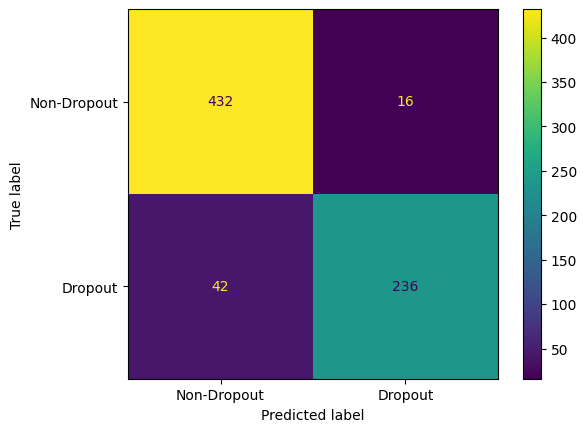

In [ ]:
perform(y_pred_rf)

In [ ]:
# Assuming you have a trained random forest classifier named model_rf and input data named ip_data
ip_data = (1,17,1,9500,1,1,141.0,1,38,38,7,10,139.8,1,0,0,1,0,0,18,0,0,8,8,8,14.935,0,0,8,8,8,14.935,0,9.4,-0.8,-3.12)
# Reshape the input data into a numpy array with shape (1, num_features)
import numpy as np
ip_data_reshaped = np.array(ip_data).reshape(1, -1)

# Make predictions on the input data
prediction = model_rf.predict(ip_data_reshaped)

# Interpret the prediction
if prediction[0] == 1:
    print("The individual is predicted to be a dropout.")
else:
    print("The individual is predicted to not dropout.")

The individual is predicted to not dropout.


In [ ]:
import pickle

In [ ]:
filename = 'dropout_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('dropout_model.pkl', 'rb'))

In [ ]:
ip_data = (1,17,1,9500,1,1,141.0,1,38,38,7,10,139.8,1,0,0,1,0,0,18,0,0,8,8,8,14.935,0,0,8,8,8,14.935,0,9.4,-0.8,-3.12)
# Reshape the input data into a numpy array with shape (1, num_features)
import numpy as np
ip_data_reshaped = np.array(ip_data).reshape(1, -1)

# Make predictions on the input data
prediction = model_rf.predict(ip_data_reshaped)

# Interpret the prediction
if prediction[0] == 1:
    print("The individual is predicted to be a dropout.")
else:
    print("The individual is predicted to not dropout.")

The individual is predicted to not dropout.


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("data.csv", sep=";")

# Get all column names
columns = df.columns

print("Columns in data.csv:")
for column in columns:
    print(column)


Columns in data.csv:
Marital status
Application mode
Application order
Course
Daytime/evening attendance	
Previous qualification
Previous qualification (grade)
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Admission grade
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP
Target
